In [3]:
import GOES as GOES
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import pandas as pd

# import cartopy.crs as ccrs
import numpy as np
# from cartopy.feature import NaturalEarthFeature

import sys  
sys.path.insert(0, '../lib')

# import Utilities as util
import test as util

## Functions

In [7]:
# download the data
flist_cth = GOES.download('goes16', 'ABI-L2-ACHAF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200102-103000', DateTimeFin = '20200102-105000', 
                      path_out='../data/')

flist_cod = GOES.download('goes16', 'ABI-L2-CODF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = '20200102-103000', DateTimeFin = '20200102-105000', 
                      path_out='../data/')

Files:
  OR_ABI-L2-ACHAF-M6_G16_s20200021030218_e20200021039525_c20200021041370.nc 100% 1.5MB 1s
  OR_ABI-L2-ACHAF-M6_G16_s20200021040218_e20200021049525_c20200021051307.nc 100% 1.5MB 1s
Files:
  OR_ABI-L2-CODF-M6_G16_s20200021030218_e20200021039525_c20200021041487.nc 100% 6.7MB 2s
  OR_ABI-L2-CODF-M6_G16_s20200021040218_e20200021049525_c20200021051465.nc 100% 6.7MB 2s


In [8]:
file_cth = flist_cth[0]
file_cod = flist_cod[0]

In [9]:
# reads the file using xarray
ds_cod = xr.open_dataset(file_cod)
ds_cth_coarse = xr.open_dataset(file_cth)

# get image with the coordinates of corners of their pixels
# -> Figure out later

# interpolate ds_cod such that points overlap
ds_cth = ds_cth_coarse.interp(x=ds_cod.x, y=ds_cod.y)



ct = util.classifyISCCP(ds_cod.COD, ds_cth.HT, ds_cod.DQF)
# # add classification to x_array
# # ds_cth.assign(CT = ct)
# # clearsky

# plt.imshow(ct)
# plt.colorbar()
# plt.show()

# plt.plot(ct.flatten(), ds_cod.COD.data.flatten(), '.')
# plt.xlabel('cloud type')
# plt.ylabel('cod')
# plt.show()

# plt.plot(ct.flatten(), ds_cth.HT.data.flatten(), '.')
# plt.xlabel('cloud type')
# plt.ylabel('cth')
# plt.show()
# np.unique(ct)

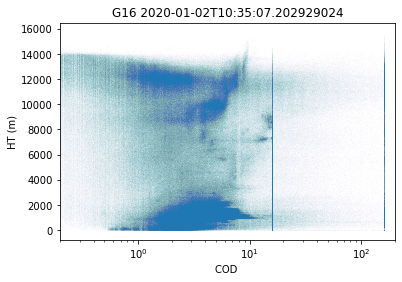

In [10]:
plt.scatter(ds_cod.COD.data.flatten(), ds_cth.HT.data.flatten(), alpha = .01, s = .1)
plt.title(f'{ds_cod.platform_ID} {ds_cod.t.data}')
plt.xlabel(f'COD ')
plt.ylabel(f'HT ({ds_cth.HT.units})')
plt.xscale('log')
plt.xlim([.2, 200])
plt.show()

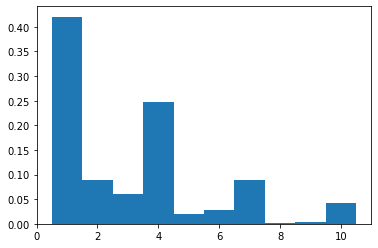

In [15]:
util.histClassifications(ct)    
plt.show()

Try to get the right domain

In [12]:
image = util.makeXArrayFromNetCDFs(file_cod, file_cth)
# plt.imshow(xr_cth.cth)
# plt.show()
# plt.imshow(res.cth)
# plt.show()


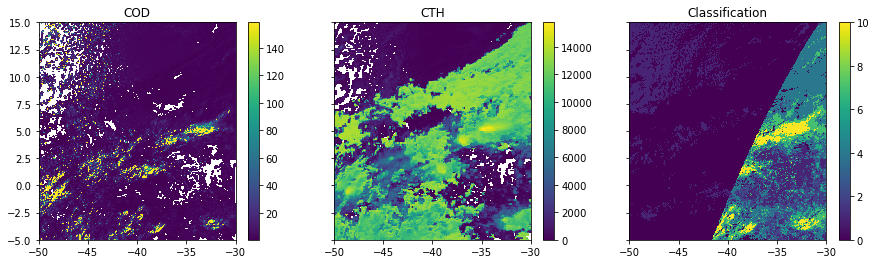

In [13]:
# Classify the clouds
ct = util.classifyISCCP(image.cod, image.cth, image.dqf_cod)
image = image.assign(ct = (["x", "y"], ct))

util.plotImage(image)
plt.show()


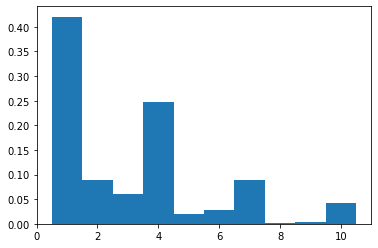

In [14]:
util.histClassifications(ct)
plt.show()

In [11]:
# Check how large saving the image would be (without the lat, lon coordinates, because they will be the same for every image)
 
util.saveImage(image)

In [ ]:
image.extent

In [12]:
# Perform function to go from downloaded data to image with correct domain and classification in netcdf file

util.rawDatatoClassification(flist_cth, flist_cod)


<xarray.Dataset>
Dimensions:  (x: 535, y: 430)
Coordinates:
    lon      (x, y) float32 -50.0 -49.95 -49.91 -49.87 ... -29.91 -29.85 -29.79
    lat      (x, y) float32 15.0 15.0 15.0 15.0 ... -5.12 -5.121 -5.122 -5.122
  * x        (x) float64 0.0 0.001873 0.003745 0.005618 ... 0.9963 0.9981 1.0
  * y        (y) float64 0.0 0.002331 0.004662 0.006993 ... 0.9953 0.9977 1.0
    time     datetime64[ns] 2020-01-02T10:45:07.202625024
Data variables:
    cod      (x, y) float32 nan nan nan nan 15.15 nan ... nan nan nan nan nan
    dqf_cod  (x, y) float32 6.0 6.0 6.0 6.0 4.0 6.0 ... 0.0 6.0 6.0 6.0 6.0 6.0
    cth      (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    ct       (x, y) int32 1 1 1 1 0 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 1 1 1 1 1
Attributes:
    extent:   [-50.0, -30.0, -5.0, 15.0]

Calculate Transition between subsequent images